## **Crop yield prediction**

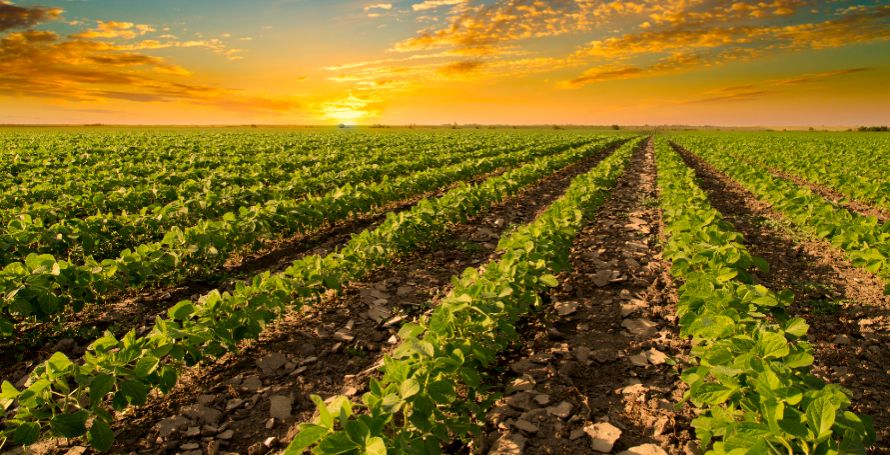

In [ ]:
from IPython.display import Image

# Display an image from a file
Image(filename='/content/R.jpg')

# **Importing the Libraries**


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf

# **Data Loading:**

### **Load the dataset**

In [ ]:
data = pd.read_csv('/content/crop_yield.csv')

### **Check the first few rows of the data**

In [ ]:
print(data.head())

           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


### **Check for missing values and data types**

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB
None


## **Data Preprocessing:**



*   **Handle Missing Values:** Fill or drop missing values, depending on the context.
*  **Feature Engineering:** Calculate the yield if not already present



Fill missing values with the median (for numerical columns) or mode (for categorical columns)

In [ ]:
data['Annual_Rainfall'] = data['Annual_Rainfall'].fillna(data['Annual_Rainfall'].median())
data['Fertilizer'] = data['Fertilizer'].fillna(data['Fertilizer'].median())
data['Pesticide'] = data['Pesticide'].fillna(data['Pesticide'].median())

If categorical columns like 'Crop' or 'State' have missing values, fill with mode

In [ ]:
data['Crop'] = data['Crop'].fillna(data['Crop'].mode()[0])
data['State'] = data['State'].fillna(data['State'].mode()[0])

Create Yield column if not already available (production per unit area)

In [ ]:
data['Yield'] = data['Production'] / data['Area']

## **Exploratory Data Analysis (EDA)**

Distribution of Crop Yield


Visualize the distribution of the target variable (Yield).

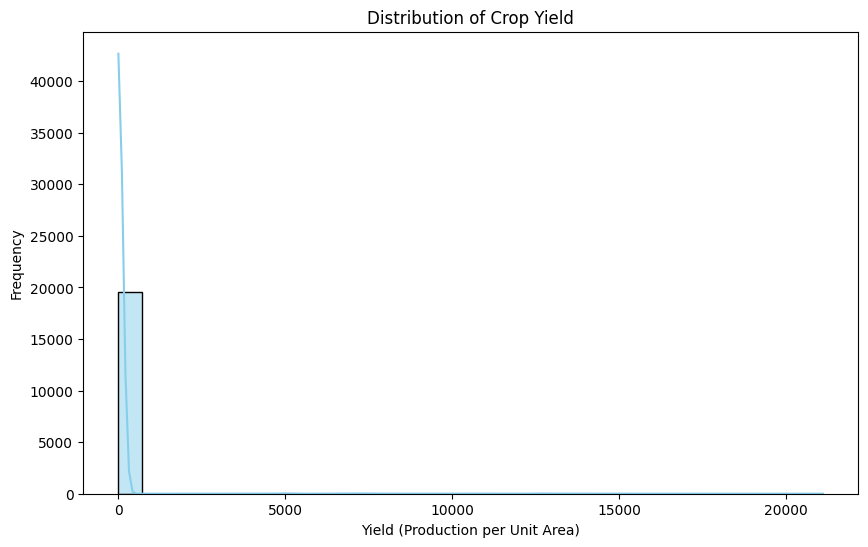

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Yield'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Crop Yield')
plt.xlabel('Yield (Production per Unit Area)')
plt.ylabel('Frequency')
plt.show()

### Crop Yield by State

Show the average yield per state to identify high-performing states.

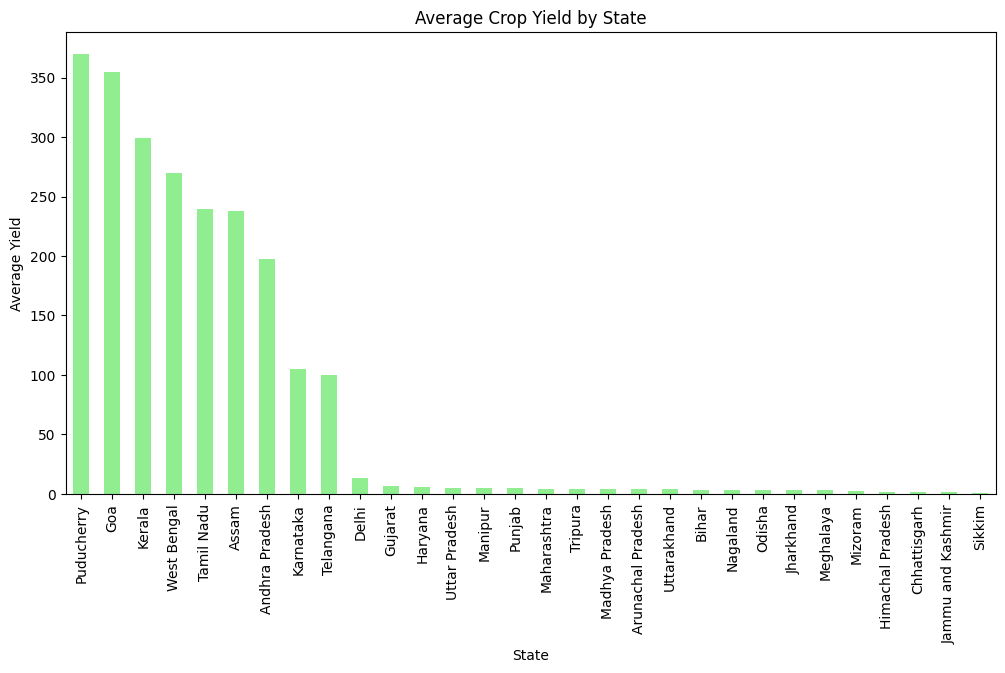

In [ ]:
avg_yield_state = data.groupby('State')['Yield'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_yield_state.plot(kind='bar', color='lightgreen')
plt.title('Average Crop Yield by State')
plt.xlabel('State')
plt.ylabel('Average Yield')
plt.xticks(rotation=90)
plt.show()

### **Correlation Heatmap**

Visualize the correlation between different features and the target variable.

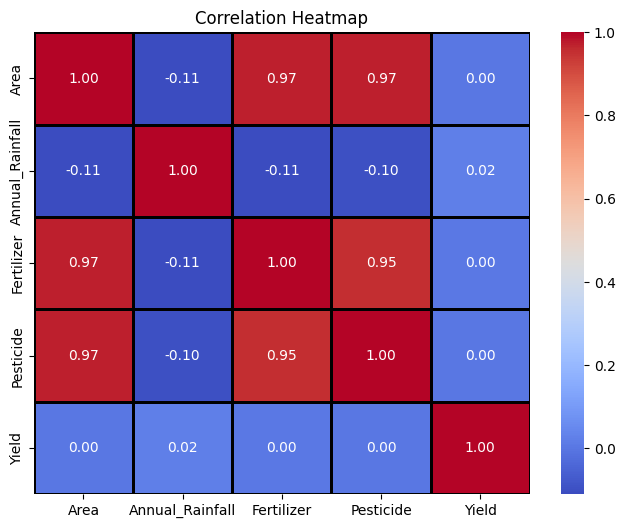

In [ ]:
corr = data[['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=1, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

### **Feature Engineering**

You can one-hot encode categorical variables (Crop, State, Season) and scale numerical variables to improve the model's performance.

In [ ]:
from sklearn.preprocessing import StandardScaler

**One-hot encode categorical variables**

In [ ]:
data = pd.get_dummies(data, columns=['Crop', 'State', 'Season'], drop_first=True)


**Standardize numerical features**

In [ ]:
scaler = StandardScaler()
data[['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']] = scaler.fit_transform(data[['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']])

### **Splitting the Data and Model Training**

Split the data into training and testing sets. Then train a model  to predict crop yield.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Define features (X) and target (y)**

In [ ]:
X = data.drop(['Yield', 'Production'], axis=1)
y = data['Yield']

**Split the data into training and testing sets (80% train, 20% test)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Initialize and train the model**

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

 **Make predictions on the test set**

In [ ]:
y_pred = model.predict(X_test)

### **Model Evaluation**

Evaluate the performance of the model using metrics such as R², RMSE, and MAE.

**Import evaluation metrics**

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**Evaluate the model**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

**Print the evaluation metrics:**

In [ ]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 9.650879409137417
Root Mean Squared Error (RMSE): 155.47306289532096
R-squared (R²): 0.9730885141032154


### **XGBoost or LightGBM**

XGBoost or LightGBM, which are more efficient and powerful for regression tasks.

In [ ]:
import xgboost as xgb

**Initialize and train XGBoost model**

In [ ]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

**Make predictions**

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

**Evaluate the XGBoost mode**

In [ ]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"RMSE (XGBoost): {rmse_xgb}")
print(f"R² (XGBoost): {r2_xgb}")

RMSE (XGBoost): 277.84898854715715
R² (XGBoost): 0.9140501725668331


## **Feature Importance Visualization**

To understand the importance of each feature in the model's predictions, visualize the feature importances.

**Get feature importance from RandomForest model**

In [ ]:
feature_importances = model.feature_importances_

**Create a DataFrame to view the feature importances**

In [ ]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

**Plot feature importance**

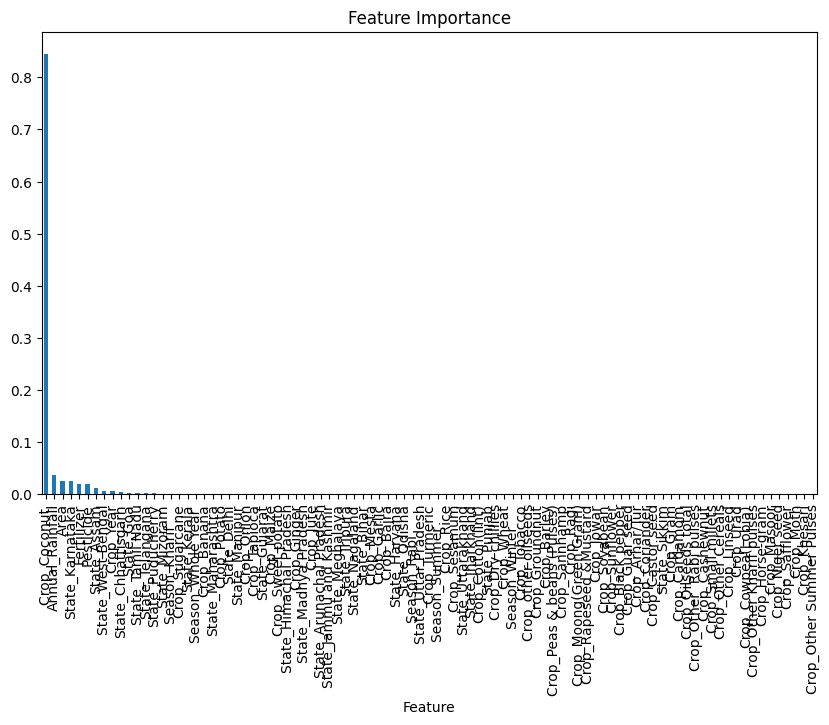

In [ ]:
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, figsize=(10, 6))
plt.title("Feature Importance")
plt.show()

### **Actual vs Predicted Crop yield value**

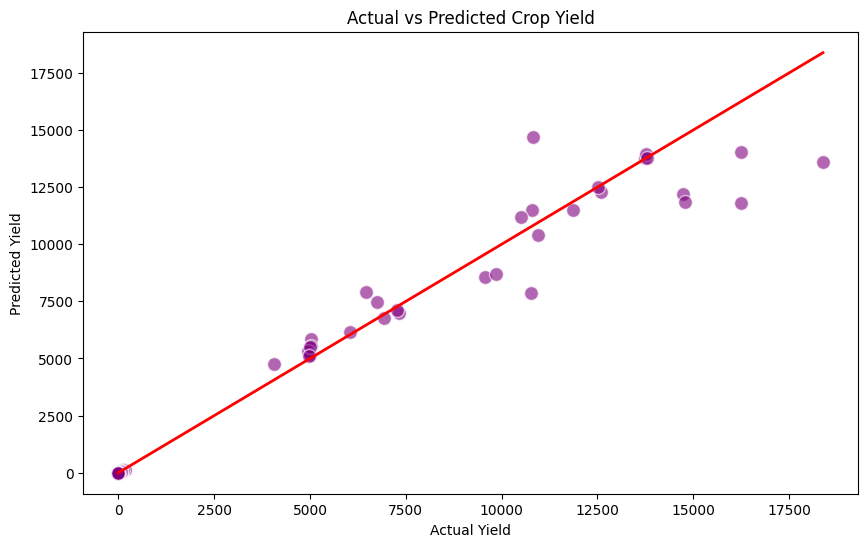

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6, edgecolors='w', s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Crop Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.show()


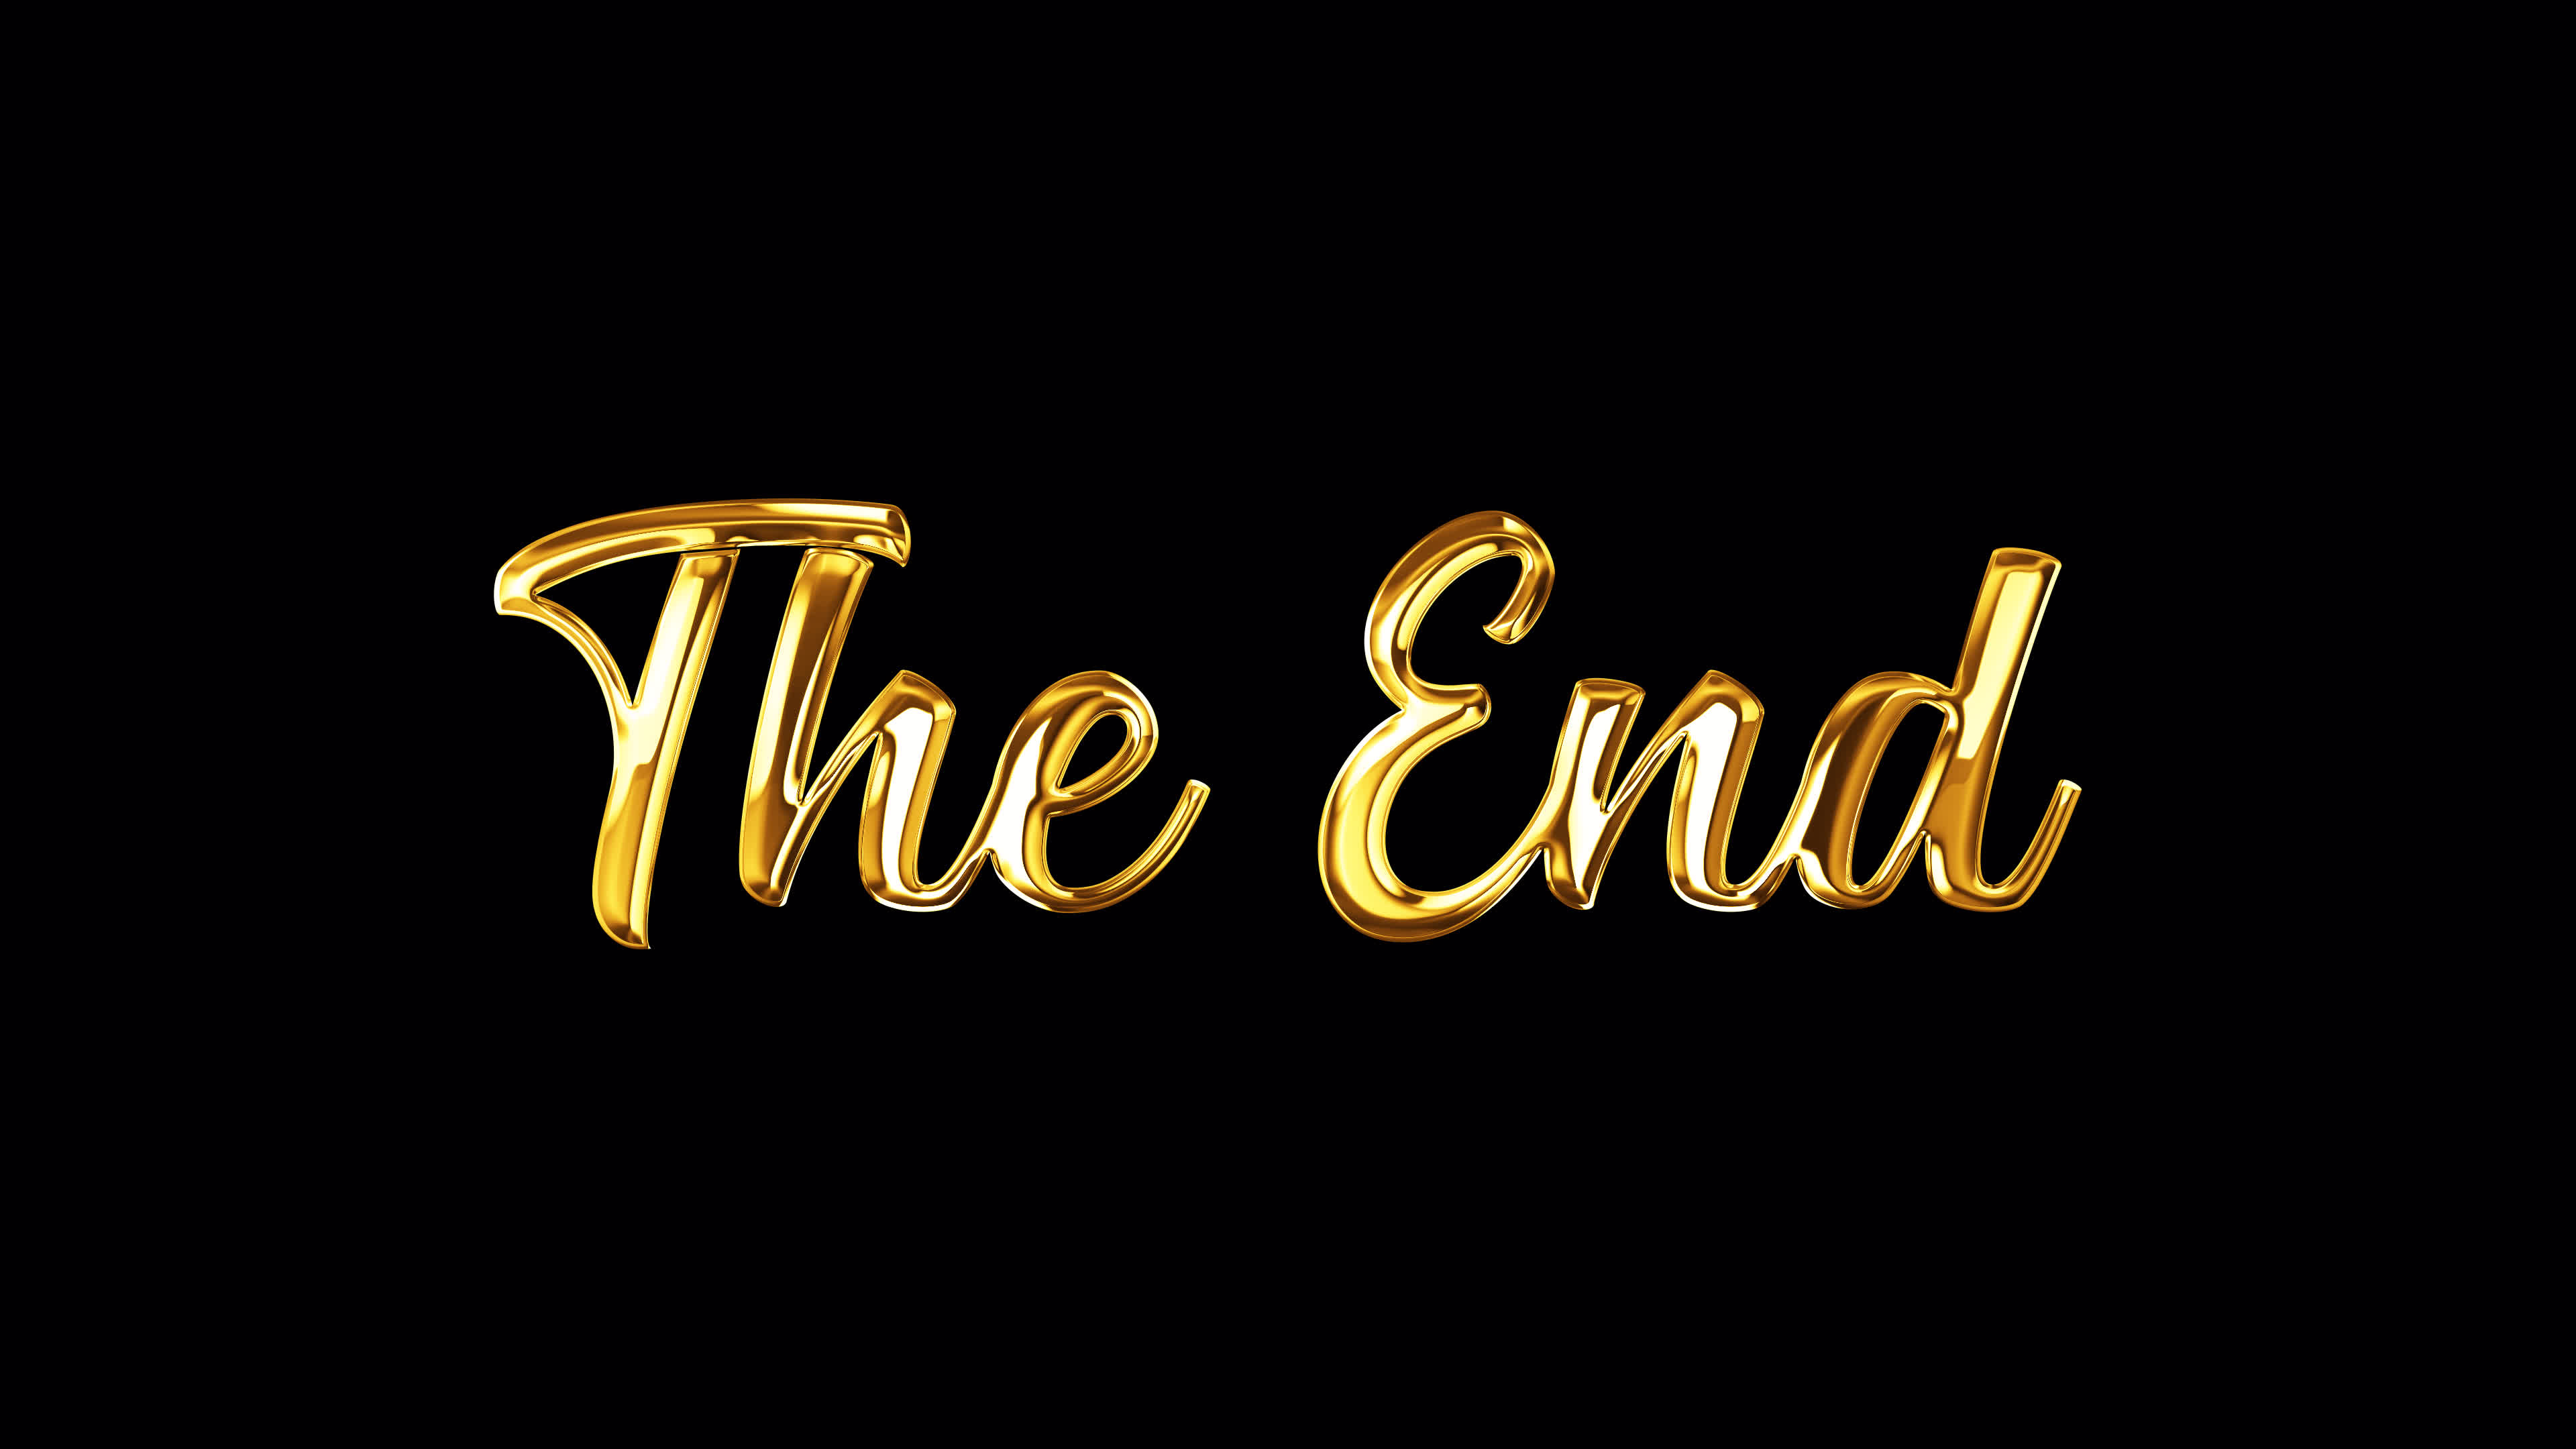

In [1]:
from IPython.display import Image

# Display an image from a file
Image(filename='/content/end 2.jpg')